In [ ]:
import tweepy

api_key = "RvnZeIl8ra88reu8fm23m0bST"
api_secret = "wTRylK94GK2KmhZUnqXonDaIszwAsS6VPvpSsIo6EX5GQLtzQo"
access_token = "959614462004117506-dkWyZaO8Bz3ZXh73rspWfc1sQz0EnDU"
access_token_secret = "rxDWfg7uz1yXMTDwijz0x90yWhDAnmOM15R6IgC8kmtTe"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

keyword = '우울증'   
search = []   

cnt = 1
while(cnt <= 10):   
    tweets = api.search(q=keyword, count=100)
    for tweet in tweets :
        search.append(tweet)
    cnt += 1

data = {}   
i = 1   
print('[' + keyword + '에 대한 트윗 글 ]')    
for tweet in search:
    data['text'] = tweet.text   
    print(i, " : ", data)   
    i += 1

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
from tqdm import tqdm

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)

In [2]:
# 직접 로그인
url = 'https://twitter.com/home'
driver.get(url)

In [3]:
keywords = ['우울', '우울증', '코로나블루']
text_list = []

for keyword in keywords:
    # 트위터 접속
    url = 'https://twitter.com/home'
    driver.get(url)
    time.sleep(2)
    css_selector = 'div.css-901oao.r-18jsvk2.r-6koalj.r-16y2uox.r-1qd0xha.r-a023e6.r-16dba41.r-rjixqe.r-bcqeeo.r-qvutc0 > input'
#react-root > div > div > div.css-1dbjc4n.r-18u37iz.r-13qz1uu.r-417010 > main > div > div > div > div.css-1dbjc4n.r-aqfbo4.r-zso239.r-1hycxz > div > div.css-1dbjc4n.r-gtdqiz.r-1hycxz > div > div > div > div.css-1dbjc4n.r-1awozwy.r-aqfbo4.r-14lw9ot.r-18u37iz.r-1h3ijdo.r-6gpygo.r-15ysp7h.r-1xcajam.r-ipm5af.r-1hycxz.r-136ojw6 > div > div > div > form > div.css-1dbjc4n.r-1wbh5a2 > div > div > div.css-901oao.r-18jsvk2.r-6koalj.r-16y2uox.r-1qd0xha.r-a023e6.r-16dba41.r-rjixqe.r-bcqeeo.r-qvutc0 > input
    # 검색 키워드 클릭
    src = driver.find_element_by_css_selector(css_selector)
    src.click()

    # 검색 키워드 입력
    elem = driver.find_element_by_css_selector(css_selector)
    elem.send_keys(keyword)
    elem.send_keys(Keys.ENTER)
    time.sleep(2)

    # Latest 클릭
    src = driver.find_element_by_css_selector('#react-root > div > div > div.css-1dbjc4n.r-18u37iz.r-13qz1uu.r-417010 > main > div > div > div > div > div > div.css-1dbjc4n.r-aqfbo4.r-14lw9ot.r-j7yic.r-rull8r.r-qklmqi.r-gtdqiz.r-1gn8etr.r-1g40b8q > div.css-1dbjc4n.r-14lw9ot > nav > div > div.css-1dbjc4n.r-1adg3ll.r-16y2uox.r-1wbh5a2.r-1pi2tsx.r-1udh08x > div > div:nth-child(2) > a > div > span')
    src.click()
    time.sleep(2)

    # 스크롤
    SCROLL_PAUSE_TIME = 4

    # 스크롤 높이 
    last_height = driver.execute_script("return document.body.scrollHeight") 
    count = 0

    for scroll in range(30):
        count += 1
        # 스크롤 무빙 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # 페이지 로드 대기 
        time.sleep(SCROLL_PAUSE_TIME) 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);") # 맨 마지막까지 스크롤하면 바로 아래 리스트가 뜨지 않는 경우가 있기 때문에 -50 추가
        time.sleep(SCROLL_PAUSE_TIME)

        # 수집
        id_selectors = driver.find_elements_by_css_selector('div.css-1dbjc4n.r-1iusvr4.r-16y2uox.r-1777fci.r-kzbkwu > div:nth-child(2) > div:nth-child(1) > div')
        for i in id_selectors:
            text_list.append(i.text)
        print(len(id_selectors), len(text_list), count)
        
        # 스크롤이 더이상 변화가 없으면 스크롤 이동 중단
        new_height = driver.execute_script("return document.body.scrollHeight") 
        if last_height == new_height:
            break
        last_height = new_height
        
    print(keyword, ': 수집완료', len(text_list))
text_set = set(text_list)
print(len(text_set))

17 17 1
19 36 2
16 52 3
19 71 4
19 90 5
19 109 6
15 124 7
20 144 8
16 160 9
18 178 10
17 195 11
17 212 12
18 230 13
21 251 14
13 264 15
18 282 16
17 299 17
17 316 18
22 338 19
13 351 20
19 370 21
14 384 22
21 405 23
19 424 24
16 440 25
20 460 26
20 480 27
20 500 28
17 517 29
15 532 30
우울 : 수집완료 532
16 548 1
17 565 2
18 583 3
17 600 4
14 614 5
15 629 6
12 641 7
18 659 8
17 676 9
15 691 10
14 705 11
13 718 12
14 732 13
12 744 14
18 762 15
13 775 16
18 793 17
18 811 18
17 828 19
17 845 20
18 863 21
20 883 22
15 898 23
16 914 24
21 935 25
19 954 26
16 970 27
19 989 28
18 1007 29
15 1022 30
우울증 : 수집완료 1022
13 1035 1
8 1043 2
9 1052 3
8 1060 4
6 1066 5
11 1077 6
13 1090 7
11 1101 8
15 1116 9
13 1129 10
11 1140 11
14 1154 12
14 1168 13
13 1181 14
13 1194 15
9 1203 16
12 1215 17
10 1225 18
8 1233 19
13 1246 20
8 1254 21
18 1272 22
16 1288 23
9 1297 24
11 1308 25
7 1315 26
8 1323 27
11 1334 28
10 1344 29
12 1356 30
코로나블루 : 수집완료 1356
1265


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [5]:
text = pd.DataFrame(text_list)
text.columns = ['text']
display(text)

,text
0,시나리오집 양도 간절히 기다리고 있습니다\n→악몽의 가시\n→우울을 굳혀 만든 것\...
1,@Sirup_2007\n 제 부계에욤 우울트 섹트 욕트 다 있으니 오실분 팔로 해줘여♡
2,@ Paengro_Making<-웨엉이 계이 계정\n/자동 트윗\n/이제 우울트 보...
3,왜인지는 모르겠는데
4,제 플계들입니다! \n혹시 당신. 오실 생각 없나요?\n\n@ protect_lll...
...,...
1351,아 코로나 블루로 할까
1352,요새 무기력증 쩌네. 코로나블루란게 이거인가 싶고..\n망할 차이니스!
1353,@chamayahannira\n 님에게 보내는 답글
1354,＂차(茶) 마시며 코로나블루 이겨요＂..차 판매량 급증 (출처 : 파이낸셜뉴스 | ...


In [8]:
text.to_csv('tweet_text.csv', encoding = "UTF-8")

In [10]:
text = pd.read_csv('tweet_text.csv', encoding = "UTF-8")
text = pd.DataFrame(text.loc[:, 'text'])
display(text)

,text
0,시나리오집 양도 간절히 기다리고 있습니다\n→악몽의 가시\n→우울을 굳혀 만든 것\...
1,@Sirup_2007\n 제 부계에욤 우울트 섹트 욕트 다 있으니 오실분 팔로 해줘여♡
2,@ Paengro_Making<-웨엉이 계이 계정\n/자동 트윗\n/이제 우울트 보...
3,왜인지는 모르겠는데
4,제 플계들입니다! \n혹시 당신. 오실 생각 없나요?\n\n@ protect_lll...
...,...
1351,아 코로나 블루로 할까
1352,요새 무기력증 쩌네. 코로나블루란게 이거인가 싶고..\n망할 차이니스!
1353,@chamayahannira\n 님에게 보내는 답글
1354,＂차(茶) 마시며 코로나블루 이겨요＂..차 판매량 급증 (출처 : 파이낸셜뉴스 | ...


In [18]:
text = pd.DataFrame(text['text'].apply(lambda x: re.sub('[^가-힣\s]', '', x)))
text = pd.DataFrame(text['text'].apply(lambda x: re.sub('\n', ' ', x)))
text

,text
0,시나리오집 양도 간절히 기다리고 있습니다 악몽의 가시 우울을 굳혀 만든 것 눈과 비...
1,제 부계에욤 우울트 섹트 욕트 다 있으니 오실분 팔로 해줘여
2,웨엉이 계이 계정 자동 트윗 이제 우울트 보단 건강트팔찌트찐덕질 트 위주교류 위주...
3,왜인지는 모르겠는데
4,제 플계들입니다 혹시 당신 오실 생각 없나요 우울 사담계 가끔 시적인 말이나...
...,...
1351,아 코로나 블루로 할까
1352,요새 무기력증 쩌네 코로나블루란게 이거인가 싶고 망할 차이니스
1353,님에게 보내는 답글
1354,차 마시며 코로나블루 이겨요차 판매량 급증 출처 파이낸셜뉴스 네이버 뉴스 방탄...


In [19]:
message = ''
for item in text['text']:
    message = message + ' ' + item

In [20]:
message

' 시나리오집 양도 간절히 기다리고 있습니다 악몽의 가시 우울을 굳혀 만든 것 눈과 비로 만든 세계  아래 오픈카톡으로 연락주세요    제 부계에욤 우울트 섹트 욕트 다 있으니 오실분 팔로 해줘여  웨엉이 계이 계정 자동 트윗 이제 우울트 보단 건강트팔찌트찐덕질 트 위주교류 위주로 열심히 새로운 마음가짐으로 할 계정 자동 트윗 왜인지는 모르겠는데 제 플계들입니다  혹시 당신 오실 생각 없나요    우울 사담계 가끔 시적인 말이나 우울함을 털어놓는 계정입니다     수위 연성이나 실제 사진을 올리는 곳입니다  아 맞다 오늘 점심 때 햄버거 먹기로 했지 존나 설레 시발 식충이는 또 쳐먹을 때만 기분 좋그등여 근데 진짜 내 모든 우울은 공부에서부터 비롯됨 일단 공부를 나게 못해서 거기서 자존감이든 자존심이든 좆나게 깎여서 우울도진것임 공부를 하면 해결됨가족관계는 어쩔수없고 이젠 스트레칭도 누워서 쳐 하네  진짜 걍 죽어주세요 이딴 게 인간이라고 살아있네요   님에게 보내는 답글 존나 휴대폰도 바꿔야 하는데 하루종일 트위터만 하는 새끼가 좋은 폰 써서 뭐하나 싶어서 개버팀  곧 뒤질 샛기가 좋은 폰은 왜  존나 겁나서 죽지도 못함 좆같음 시발   님에게 보내는 답글 요즘 반지가 사고 싶은데 시발 곧 죽니 마니 하는 새끼 손가락에 무슨 금가락지를 끼나 일상계트친소 트친소 울상계 여 일상 우울 애인있음  나랑 짱친하자 섹계 빼고 다받음 흔적 남겨주쉐이 앰네스티와 함께 미얀마 군부의 심각한 인권 침해를 알리는 일에 동참해주세요  여러분의 관심은 인권 침해의 진실을 찾고 전 세계에 알리는데 큰 도움이 됩니다 씨바 내가 어제 얼마나 우울햇는데 시발 수영은 죽을 때까지 배우면 안 되겠네 혹시라도 물에 빠져 죽을 기회가 생겼는데 존나 본능적으로 해엄쳐나오면 시벌 개좆같을 듯 아 시발 다 좆같네 지금 씻고 일어나서 밥 먹으면 되는데 그럼 다시 못 눕잖아 안 일어날래  연  채무통합 차 정부지원 안내  연  한도 억  최장개월  우대사항  대보험 가입 근로자  신용카드 보유 근로자 

In [25]:
message = re.sub('블루', '', message)
message = re.sub('답글', '', message)
message = re.sub('경기도', '', message)
message = re.sub('경기', '', message)
message = re.sub('전시', '', message)
message = re.sub('마스크', '', message)
message = re.sub('트친소', '', message)
message = re.sub('미얀마', '', message)
message = re.sub('군부', '', message)

In [26]:
nlp = Okt()
message_N = nlp.nouns(message)
# message_N

In [27]:
count = Counter(message_N)
type(count)

collections.Counter

In [28]:
word_count = dict()
for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print(tag,':',counts)

우울증 : 456
코로나 : 418
우울 : 362
사람 : 108
생각 : 100
사용자 : 69
그냥 : 69
오늘 : 65
진짜 : 65
쇼핑 : 59
쿠팡 : 56
인권 : 52
침해 : 52
건축 : 51
디자인 : 49
탈출 : 49
우대 : 46
근로자 : 46
온라인 : 44
때문 : 43
지금 : 40
친구 : 39
세계 : 38
발열 : 37
시간 : 36
도시 : 36
요즘 : 35
도움 : 35
마음 : 35
모두 : 35
여러분 : 34
병원 : 34
극복 : 33
지원 : 31
무료 : 31
일상 : 29
상담 : 29
사회 : 29
손씻기 : 29
포럼 : 29
기분 : 28
관심 : 28
과태료 : 28
공정 : 28
한세상 : 28
월일 : 28
착용 : 28
비대 : 28
진실 : 27
안내 : 27
수원시 : 27
앰네스티 : 26
동참 : 26
정도 : 26
존나 : 25
정부 : 25
뉴스 : 25
보고 : 25
모임 : 25
출처 : 25


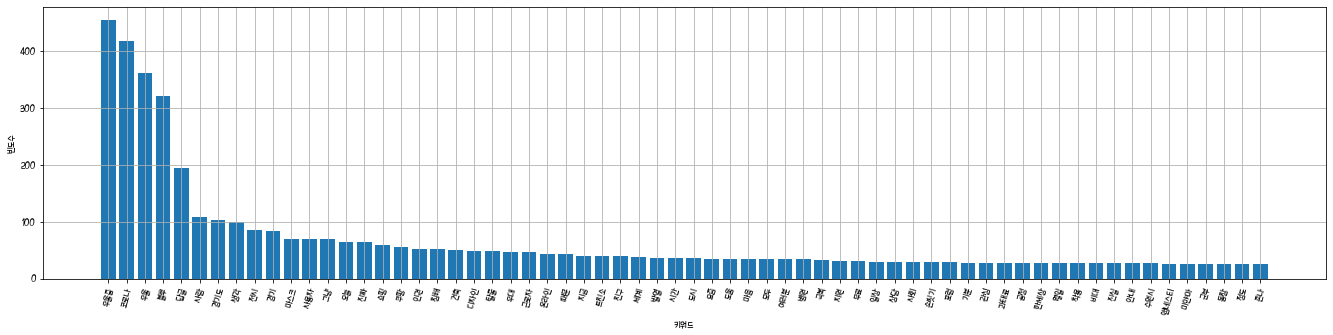

In [24]:
from matplotlib import font_manager, rc
font_path = "THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

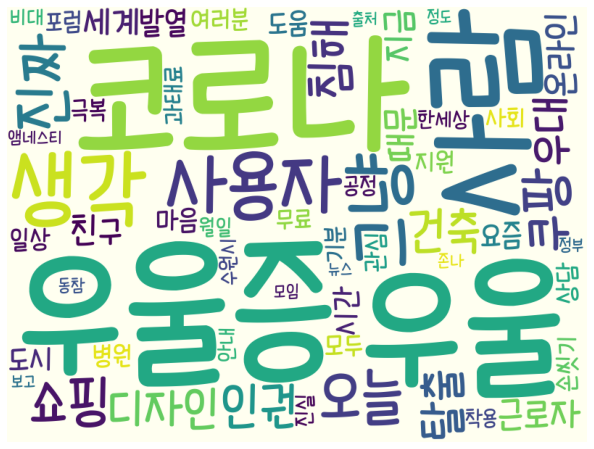

In [33]:
wc = WordCloud(font_path=font_path,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2, background_color='ivory', width=800, height=600
                      ).generate_from_frequencies(dict(word_count))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(15,8))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()
wc.to_file('twitter.png')